# 1) Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 2) Data Loading

In [23]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.shape

(150, 5)

In [25]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


# 3) Exploratory Data Analysis

In [26]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(3)

In [28]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

In [29]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species             str
dtype: object

In [40]:
df['species'] = df['species'].astype('category').cat.codes
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species            int8
dtype: object

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
correlation_matrix = df.corr()
correlation_matrix['species'].sort_values(ascending=False)

species         1.000000
petal_width     0.955693
petal_length    0.948339
sepal_length    0.782904
sepal_width    -0.418348
Name: species, dtype: float64

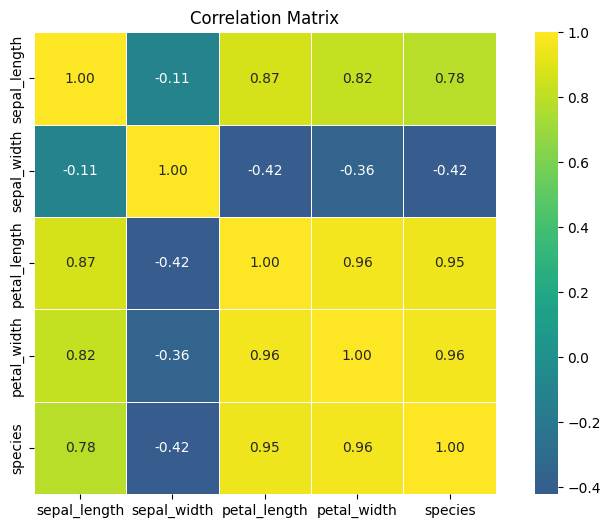

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, square=True, linewidths=.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 4) Data Preprocessing

In [44]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (117, 4)
X_test shape: (30, 4)
y_train shape: (117,)
y_test shape: (30,)


# 5) Model Training and Evaluation

$ a) BernoulliNB $

In [45]:
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train_scaled, y_train)
y_pred_bernoulli = bernoulli_model.predict(X_test_scaled)
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bernoulli))
print("\nBernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bernoulli))
print("\nBernoulliNB Precision:", precision_score(y_test, y_pred_bernoulli, average=None))
print("\nBernoulliNB Recall:", recall_score(y_test, y_pred_bernoulli, average=None))
print("\nBernoulliNB F1 Score:", f1_score(y_test, y_pred_bernoulli, average=None))

BernoulliNB Confusion Matrix:
 [[10  0  0]
 [ 1  2  7]
 [ 0  0 10]]

BernoulliNB Accuracy: 0.7333333333333333

BernoulliNB Precision: [0.90909091 1.         0.58823529]

BernoulliNB Recall: [1.  0.2 1. ]

BernoulliNB F1 Score: [0.95238095 0.33333333 0.74074074]


In [46]:
bernoulli_cross_val_scores = cross_val_score(bernoulli_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("BernoulliNB Cross-Validation Accuracy Scores:\n", bernoulli_cross_val_scores)

BernoulliNB Cross-Validation Accuracy Scores:
 [0.91666667 0.625      0.7826087  0.82608696 0.69565217]


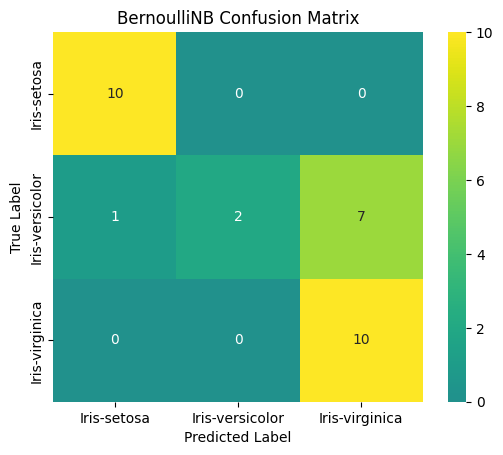

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred_bernoulli), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('BernoulliNB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train_scaled, y_train)
y_pred_gaussian = gaussian_model.predict(X_test_scaled)
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gaussian))
print("\nGaussianNB Accuracy:", accuracy_score(y_test, y_pred_gaussian))
print("\nGaussianNB Precision:", precision_score(y_test, y_pred_gaussian, average=None))
print("\nGaussianNB Recall:", recall_score(y_test, y_pred_gaussian, average=None))
print("\nGaussianNB F1 Score:", f1_score(y_test, y_pred_gaussian, average=None))

GaussianNB Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

GaussianNB Accuracy: 0.9333333333333333

GaussianNB Precision: [1.  0.9 0.9]

GaussianNB Recall: [1.  0.9 0.9]

GaussianNB F1 Score: [1.  0.9 0.9]


In [49]:
gaussian_cross_val_scores = cross_val_score(gaussian_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("GaussianNB Cross-Validation Accuracy Scores:\n", gaussian_cross_val_scores)

GaussianNB Cross-Validation Accuracy Scores:
 [0.95833333 1.         0.91304348 1.         0.95652174]


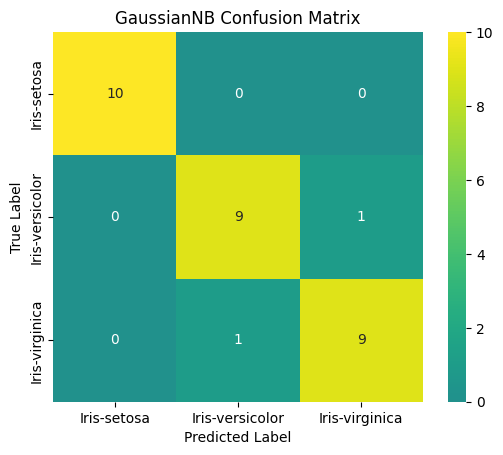

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred_gaussian), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('GaussianNB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nLogistic Regression Precision:", precision_score(y_test, y_pred_log_reg, average=None))
print("\nLogistic Regression Recall:", recall_score(y_test, y_pred_log_reg, average=None))
print("\nLogistic Regression F1 Score:", f1_score(y_test, y_pred_log_reg, average=None))

Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Logistic Regression Accuracy: 0.9333333333333333

Logistic Regression Precision: [1.  0.9 0.9]

Logistic Regression Recall: [1.  0.9 0.9]

Logistic Regression F1 Score: [1.  0.9 0.9]


In [52]:
log_reg_cross_val_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy Scores:\n", log_reg_cross_val_scores)

Logistic Regression Cross-Validation Accuracy Scores:
 [0.95833333 0.95833333 0.91304348 1.         0.95652174]


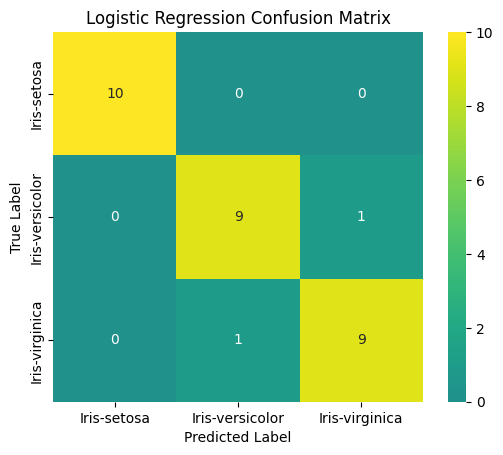

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/tmp/ipykernel_18745/1887465503.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = ['BernoulliNB', 'GaussianNB', 'Logistic Regression'],


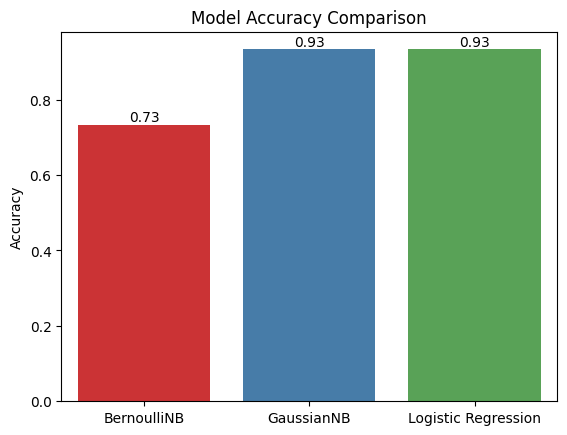

In [54]:
ax = sns.barplot(x = ['BernoulliNB', 'GaussianNB', 'Logistic Regression'],
            y = [accuracy_score(y_test, y_pred_bernoulli),
                 accuracy_score(y_test, y_pred_gaussian),
                 accuracy_score(y_test, y_pred_log_reg)], palette='Set1')
for container in ax.containers:
     ax.bar_label(container, fmt='%.2f')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

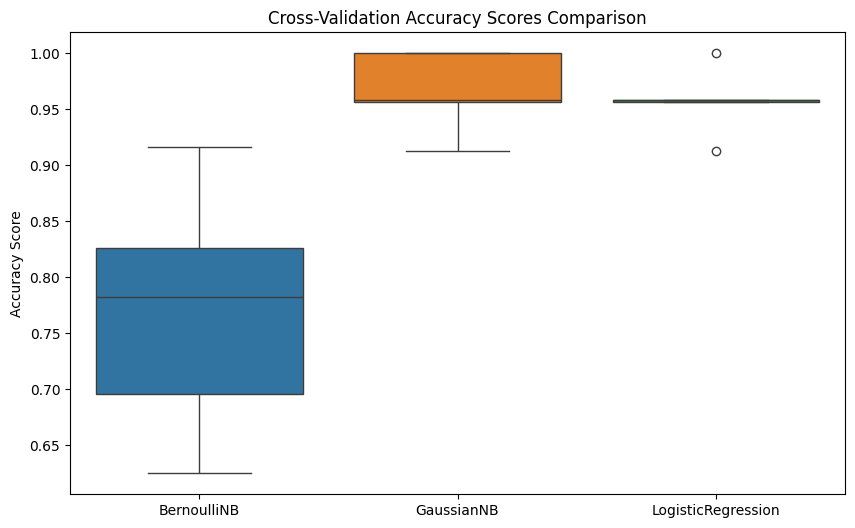

In [55]:
cv_data = pd.DataFrame({
    'BernoulliNB': bernoulli_cross_val_scores,
    'GaussianNB': gaussian_cross_val_scores,
    'LogisticRegression': log_reg_cross_val_scores
})
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_data)
plt.title('Cross-Validation Accuracy Scores Comparison')
plt.ylabel('Accuracy Score')
plt.show()

Both GaussianNB and Logistic Regression performes good